# Milestone Action Items (Day 4: Pandas)

Download the data set about Value of Energy Cost Saving Program for businesses in New York City (under the "Export" option, there is a way to retrieve a CSV file). Answer the following questions.

1. How many different companies are represented in the data set?

2. What is the total number of jobs created for businesses in Queens?

3. How many different unique email domains names are there in the data set?

4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

5. Save your result for the previous question as a CSV file.

In [41]:
#First, let's get pandas up and running, and load in our dataset:
import pandas as pd

#Read in the csv file (and make sure the file is in the same directory as this notebook when running, for the sake of filepath:)
df_energy = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
df_energy.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


## Question 4.1: How many different companies are represented in the data set?

In [42]:
df_energy.info()
#The dataset has 450 non-null values for company names.

#However, this question is probably asking for the number of unique company name entries are in the dataframe:
df_energy['Company Name'].nunique()
#Which gives us 439 unique companies.

#Note: neither of these may be right, if the same company name is spelled multiple ways; i.e., the same company could be
#counted multiple times if it has more than one spelling/capitalization pattern/etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

439

## Question 4.2: What is the total number of jobs created for businesses in Queens?

In [43]:
#'Queens' can be an entry in 'City' or in 'Borough'. Possibly other places as well.
#However, the 'City' version has 2-3 different spellings, while Borough only has 1.
print(df_energy['City'].unique())
print(df_energy['Borough'].unique())

['Brooklyn' 'NY' 'New York' 'Long Island City' 'Staten Island'
 'College Point' 'Lond Island City' 'Queens' 'Ozone Park' 'Forest Hills'
 'Bronx' 'Brooklyn,' 'New YOrk' 'BRONX' 'Maspeth' 'QUEENS' 'BROOKLYN'
 'Jamaica' 'Brookln' 'Ridgewood' 'GLENDALE' 'Flushing' 'Bronx,' 'Astoria'
 'LONG ISLAND CITY' 'Springfield Gardens' 'BROOKLYN HEIGHT'
 'Queens Village' 'NEW YORK' 'Brooklym' 'Far Rockaway' 'Woodside'
 'COLLEGE POINT' 'RIDGEWOOD' 'PORT MORRIS' 'INWOOD' 'L.I.C.' 'bronx']
['Brooklyn' 'New York' 'Queens' 'Staten Island' 'Bronx']


In [44]:
#Thus we'll group by Borough for this analysis.

#Create a new dataframe with only the entries that have 'Queens' as the Borough:
df_queens = df_energy.query('Borough == "Queens"')
df_queens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 6 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               173 non-null    object 
 1   company contact                            173 non-null    object 
 2   company email                              169 non-null    object 
 3   company phone                              173 non-null    object 
 4   Address                                    173 non-null    object 
 5   City                                       173 non-null    object 
 6   State                                      173 non-null    object 
 7   Postcode                                   173 non-null    int64  
 8   Industry                                   173 non-null    object 
 9   Industry descr                             172 non-null    object 
 10  Company Type              

In [45]:
#Now let's add up the values we find in our 'Job created' column:
df_queens['Job created'].sum()
#102 jobs were created for Queens companies.

102.0

In [46]:
#As an alternative, if we wanted to drop all of the NA rows first:
df_qjobs = df_queens.dropna(subset=['Job created'])
print(df_qjobs['Job created'])
sum(df_qjobs['Job created'])
#Still comes out to 102 jobs created.

29     10.0
37     60.0
137    10.0
325     2.0
433    20.0
Name: Job created, dtype: float64


102.0

## Question 4.3: How many different unique email domains names are there in the data set?

In [47]:
#This is asking for DOMAIN names, not unique email addresses. Looking at the text after the '@' should be informative.

#First, lets drop the rows when had no e-mail address:
df_emails = df_energy.dropna(subset=['company email'])
df_emails.info()
#This leaves us with 433 rows, which agrees with the number of non-null emails we had in the full dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               433 non-null    object 
 1   company contact                            433 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              433 non-null    object 
 4   Address                                    433 non-null    object 
 5   City                                       433 non-null    object 
 6   State                                      433 non-null    object 
 7   Postcode                                   433 non-null    int64  
 8   Industry                                   433 non-null    object 
 9   Industry descr                             422 non-null    object 
 10  Company Type              

In [48]:
#Some entries on this list have a very notable issue: a domain name but no user name or '@'. Example:
df_emails.loc[df_emails['company email'] == 'billieannplastics.com']
#So any extraction of email domain names cannot rely on '@'.

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
75,BILLIE-ANN PLASTICS PKGING CORP,Bill Rubinstein,billieannplastics.com,7184975555,360 AND 372 TROUTMAN STREET,Brooklyn,NY,11237,Manufacturing,Plastic moldings,...,101981.15,Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#A solution:

#Create a new series/column to hold our email domains.
#Use str.extract to pull out our pattern: any number of alphanumerics, a period, and any number of alphanumerics.
#Besides this capture group, it must also be followed by an end of line character ($), to prevent pinging user names:
df_emails['email domains'] = df_emails['company email'].str.extract(r'(\w+\.\w+)$')
df_emails.head()

C:\Users\qtrac\AppData\Local\Temp\ipykernel_20900\4091667256.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emails['email domains'] = df_emails['company email'].str.extract(r'(\w+\.\w+)$')


,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,email domains
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood,energyspec.com
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West,industrycity.com
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan,silvprop.com
5,"120 Wall Street, LLC",Jason McCalla,jmccalla@silvprop.com,2125517391,120 Wall Street,New York,NY,10005,Commercial,Back Offices,...,New York,40.704380,-74.006427,101.0,1.0,7.0,1000871.0,1.000370e+09,Battery Park City-Lower Manhattan,silvprop.com
6,"139 ACA Realty, Inc.",Eitan Chandally,barbara@dial7.com,7187076123,43-23 35th Street,Long Island City,NY,11101,Commercial,Limousine Service,...,Queens,40.745706,-73.929565,402.0,26.0,179.0,4003160.0,4.002220e+09,Hunters Point-Sunnyside-West Maspeth,dial7.com


In [50]:
#After an inspection of our 'email domains' column, it looks like we extracted the information we wanted from the emails:
df_emails['email domains'].unique()

array(['energyspec.com', 'industrycity.com', 'silvprop.com', 'dial7.com',
       'gmail.com', 'atjelectrical.com', 'KLCNY.com', 'jll.com',
       'centuryoptics.com', '4over4.com', 'aol.com', 'MEQS.com',
       'partners.com', 'alscientific.com', 'aksinternational.com',
       'abelcine.com', 'abigal.com', 'accenture.com', 'bilingualsino.com',
       'actioncarting.com', 'aduiepyle.com', 'aecom.com', 'remains.com',
       'afcindustries.com', 'africanservices.com', 'avac.org',
       'aladdinbakery.com', 'yu.edu', 'alchemypaintworks.com',
       'allcitymetal.com', 'alleprocessing.com', 'netzero.net',
       'allisoneden.comP', 'allstatemedical.com', 'alrue.com',
       'amazon.com', 'americanbridge.net', 'folkartmuseum.org',
       'transit.com', 'amysbread.com', 'busch.com', 'apexglobe.com',
       'bank.com', 'approvedoil.com', 'aristacoffee.com', 'armadany.com',
       'arrowlinen.com', 'asymptote.net', 'bthayerassociates.com',
       'bcsroyal.com', 'bpair.com', 'blindbuildersusa.

In [51]:
#Finally, our count of the unique email domains:
df_emails['email domains'].nunique()
#359 unique email domains.

359

## Question 4.4: Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [52]:
#I will assume, perhaps foolishly, that each row is a unique business, so we just need to find the NTAs with at least 5 rows.
df_energy['NTA'].value_counts()

Hunters Point-Sunnyside-West Maspeth        75
Sunset Park West                            48
Queensbridge-Ravenswood-Long Island City    16
park-cemetery-etc-Brooklyn                  15
Greenpoint                                  14
                                            ..
Washington Heights South                     1
Forest Hills                                 1
Morrisania-Melrose                           1
Ocean Hill                                   1
Co-op City                                   1
Name: NTA, Length: 79, dtype: int64

In [53]:
#First, let's drop our NA rows: 
df_NTA = df_energy.dropna(subset=['NTA'])
df_NTA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               409 non-null    object 
 1   company contact                            409 non-null    object 
 2   company email                              395 non-null    object 
 3   company phone                              409 non-null    object 
 4   Address                                    409 non-null    object 
 5   City                                       409 non-null    object 
 6   State                                      409 non-null    object 
 7   Postcode                                   409 non-null    int64  
 8   Industry                                   409 non-null    object 
 9   Industry descr                             395 non-null    object 
 10  Company Type              

In [54]:
#Next, let's retain only the rows where the NTA value is represented at least 5 times in our dataframe:
df_NTA5 = df_NTA[df_NTA['NTA'].map(df_NTA['NTA'].value_counts()>=5)]
df_NTA5['NTA'].value_counts()

Hunters Point-Sunnyside-West Maspeth                75
Sunset Park West                                    48
Queensbridge-Ravenswood-Long Island City            16
park-cemetery-etc-Brooklyn                          15
Mott Haven-Port Morris                              14
Greenpoint                                          14
Hunts Point                                         13
East Williamsburg                                   11
Carroll Gardens-Columbia Street-Red Hook            11
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill    10
Bushwick South                                      10
Manhattanville                                       9
Maspeth                                              9
East New York                                        9
Crown Heights North                                  9
Battery Park City-Lower Manhattan                    9
Steinway                                             7
College Point                                        7
Springfiel

In [55]:
#Now let's actually group by NTA:
NTA5_groups = df_NTA5.groupby('NTA')

In [56]:
#The wording of the question feels a little ambiguous, but I believe it is asking for the average of 'Total Savings'
#and the sum total of 'Job created' within each group.

#Find the total number of jobs created within each NTA value, and save it to a dataframe.
NTA5_results = NTA5_groups['Job created'].sum().to_frame()

#Find the average total savings within each NTA value, and save it as another column in our new dataframe.
NTA5_results['Average Total Savings'] = NTA5_groups['Total Savings'].mean()
NTA5_results

,Job created,Average Total Savings
NTA,,
Battery Park City-Lower Manhattan,0.0,469890.796667
Bushwick South,10.0,26140.455000
Carroll Gardens-Columbia Street-Red Hook,0.0,24337.390000
College Point,2.0,17159.372857
Crown Heights North,0.0,4036.298889
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,0.0,59950.340000
East New York,15.0,48433.093333
East Williamsburg,0.0,13990.626364
Greenpoint,0.0,9753.649286


## Question 4.5: Save your result for the previous question as a CSV file.

In [57]:
from datetime import datetime
import os

#Create an 'output' directory if we don't already have one:
if not os.path.exists('output'):
    os.mkdir('output')

#Find the current date:
date = datetime.now().strftime('%Y%m%d')

#Export our file as 'results_(Today's date).csv' in our 'output' directory
file_path = os.path.join('output', 'results_' + date + '.csv')

#Export our dataframe from the previous question as a .csv file to the place we specified:
NTA5_results.to_csv(file_path, index=True)

# Milestone Action Items (Day 5: Plotting)

Using the same data set and results that you were working with in the pandas action items section (Day 4), create a:

1. scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
2. histogram of the log of the average total savings.
3. line plot of the total jobs created for each month.

In [58]:
#First, let's get pandas and our plotting packages up and running, and load in our dataset (some of these were already loaded
#from Day 4 activities):
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#Read in the csv file (and make sure the file is in the same directory as this notebook when running, for the sake of filepath:)
df_energy = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
df_energy.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [59]:
#Also load in the .csv file of results that we exported last time:
df_groups = pd.read_csv(file_path)
df_groups

,NTA,Job created,Average Total Savings
0,Battery Park City-Lower Manhattan,0.0,469890.796667
1,Bushwick South,10.0,26140.455000
2,Carroll Gardens-Columbia Street-Red Hook,0.0,24337.390000
3,College Point,2.0,17159.372857
4,Crown Heights North,0.0,4036.298889
5,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,0.0,59950.340000
6,East New York,15.0,48433.093333
7,East Williamsburg,0.0,13990.626364
8,Greenpoint,0.0,9753.649286
9,Hunters Point-Sunnyside-West Maspeth,0.0,23931.398933


## Question 5.1: Create a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

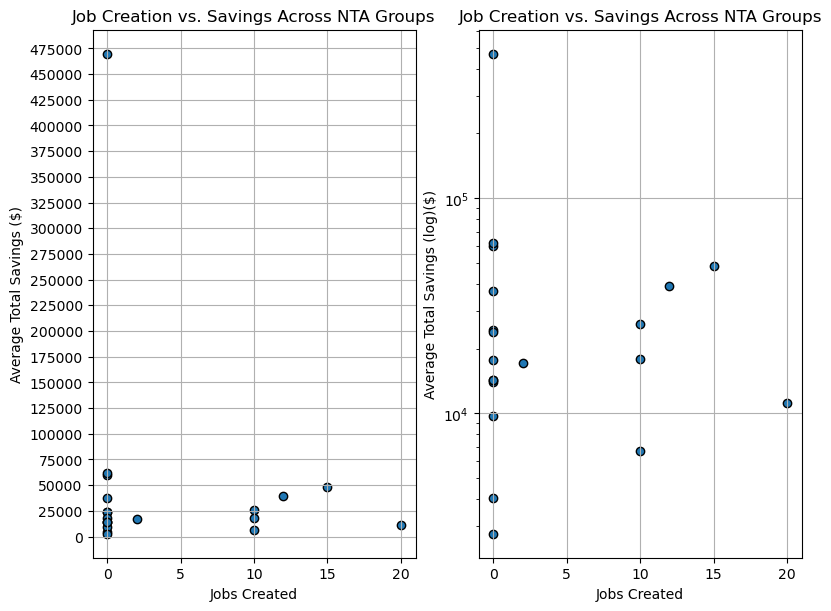

In [60]:
#Judging by the wording, I believe this is referring to the jobs created and average total savings, broken down by NTA, 
#that we exported before.

fig, axs = plt.subplots(1, 2, figsize=(8, 6), layout='constrained')

#Let's set what data will be on our x and y axes. Following convention, we make sure these data are numpy arrays to make sure
#the plotting will function as expected.
xdata = np.asarray(df_groups['Job created'])
ydata = np.asarray(df_groups['Average Total Savings'])

#Let's set up the unscaled plot first:
axs[0].scatter(xdata, ydata, facecolor='C0', edgecolor='k')

#Set the plot title and axes labels:
axs[0].set_title('Job Creation vs. Savings Across NTA Groups')
axs[0].set_xlabel('Jobs Created')
axs[0].set_ylabel('Average Total Savings ($)')

#Adjust the major yticks and add gridlines, for readability:
axs[0].set_yticks(np.arange(0, 500000, 25000))
axs[0].grid(True)

#Now set up our log-scaled plot:
axs[1].scatter(xdata, ydata, facecolor='C0', edgecolor='k')
axs[1].set_title('Job Creation vs. Savings Across NTA Groups')
axs[1].set_xlabel('Jobs Created')
axs[1].set_ylabel('Average Total Savings (log)($)')
axs[1].grid(True)

#Specify the yscale to be 'log', so that our y-axis is automatically log-scaled:
axs[1].set_yscale('log')

## Question 5.2: Create a histogram of the log of the average total savings.

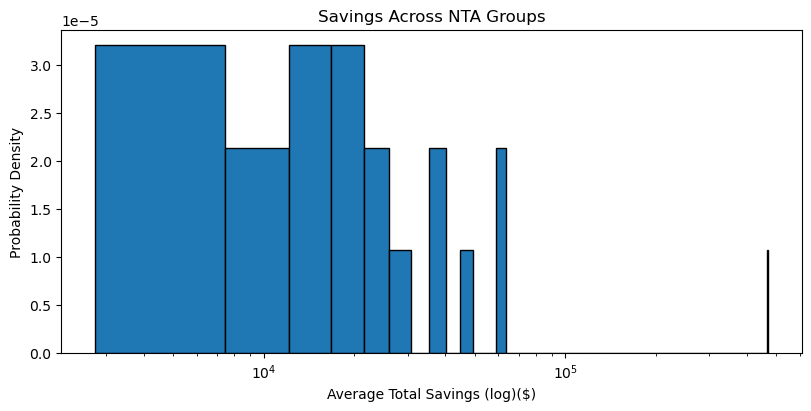

In [61]:
#Set up our histogram:
fig, ax = plt.subplots(figsize=(8,4), layout='constrained')
n, bins, patches = ax.hist(ydata, 100, density=True, facecolor='C0', edgecolor='black')

#Set our title and axis labels:
ax.set_title('Savings Across NTA Groups')
ax.set_xlabel('Average Total Savings (log)($)')
ax.set_ylabel('Probability Density')

#Log-scale our savings data:
ax.set_xscale('log')

## Question 5.3: Create a line plot of the total jobs created for each month.

In [62]:
#This question seems to be asking to go back to the original data frame, and plot jobs created (regardless of NTA)
#by the month the data row is attributed to.

#It's less clear if this is asking the results to be collapsed across years (12 data points total) or wants a
#month-by-month graph across all the years reported here.

#To start, we want to group the original data by MONTH, which we can find from the 'Effective Date' column.
#These dates are strings in MM/DD/YYYY format, so let's convert them to datetimes (hopefully no problems with their entries):
df_energy['Datetimes'] = pd.to_datetime(df_energy['Effective Date'], errors='raise')
print(df_energy['Datetimes'])

#There are 450 nonnull entries for 'Effective Date', suggesting no missing data.
print(df_energy.info())

0     2005-03-04
1     2008-04-02
2     2015-01-05
3     2020-02-03
4     2017-06-30
         ...    
445   2008-12-09
446   2017-12-05
447   2018-08-03
448   2016-01-26
449   2019-10-03
Name: Datetimes, Length: 450, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Company Name                               450 non-null    object        
 1   company contact                            450 non-null    object        
 2   company email                              433 non-null    object        
 3   company phone                              450 non-null    object        
 4   Address                                    450 non-null    object        
 5   City                                       450 non-null    object        
 6   State              

In [63]:
#Again, it isn't clear if we are collapsing into 12 timepoints, or doing one timepoint for each month-year combo.
#Below is how we might find the appropriate data for each month-year combo:


df_mgroups = df_energy.groupby(pd.Grouper(key='Datetimes', freq='1M')) # groupby each 1 month

#Within each of our groups, sum up the number of jobs created and make a new dataframe:
df_mresults = df_mgroups['Job created'].sum().to_frame()
df_mresults
#However, since we went from 450 to 330 rows (not much aggreggation within each timebin),
#my guess is the intention is 12 timepoints, so we'll plot the linegraph that way.

,Job created
Datetimes,
1993-02-28,15.0
1993-03-31,0.0
1993-04-30,0.0
1993-05-31,0.0
1993-06-30,0.0
...,...
2020-03-31,0.0
2020-04-30,0.0
2020-05-31,0.0


In [64]:
#Here, we group by the month value found in our datetimes, and sum up the 'jobs created' within each month:
df_m12groups = df_energy.groupby(df_energy['Datetimes'].dt.month)['Job created'].sum().to_frame()
df_m12groups

,Job created
Datetimes,
1,0.0
2,27.0
3,20.0
4,2.0
5,2.0
6,63.0
7,20.0
8,0.0
9,0.0


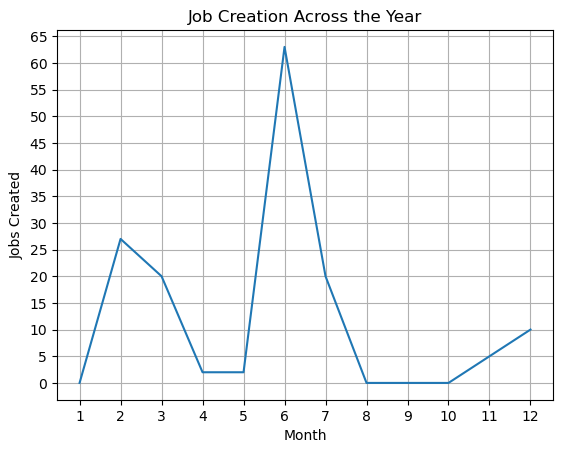

In [65]:
#Finally, let's create a line graph of this data:

fig, ax = plt.subplots()  # Create a figure containing a 'single' axis.

#Set up our x- and y-axis data
xdata = np.asarray(df_m12groups.index)
ydata = np.asarray(df_m12groups['Job created'])

ax.plot(xdata, ydata)  # Plot some data on the axes.

#Set the plot title and axes labels:
ax.set_title('Job Creation Across the Year')
ax.set_xlabel('Month')
ax.set_ylabel('Jobs Created')

#Adjust the major xticks and yticks and add gridlines, for readability:
ax.set_xticks(np.arange(1, 13, 1))
ax.set_yticks(np.arange(0, 70, 5))
ax.grid(True)